In [1]:
import os
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from datagen import ListDataset
from util import pc2voxel_v2, voxel2pc_v2, rotate_pc, drop_sampling, random_init_sampling

In [2]:
Flag = {"augmentation" : False,
        "axis_normalize" : False,
       }

num_pts = 4096


In [5]:
dataset = ListDataset(root='/root/DB/', dataset='densepoint', mode="train", num_pts=num_pts, 
                      transform=None)

data = (dataset.data).transpose(0, 2, 1)
color = (dataset.color).transpose(0, 2, 1)

print(data.shape)
print(color.shape)

# original pt : -1 ~ 1
# original color : 0 ~ 255
# vexel pt : 0 or 1
# vexel color : -1 ~ 1

(1523, 4096, 3)
(1523, 4096, 3)


-------------------------------------------------------------


ValueError: 'c' argument has 4096 elements, which is not acceptable for use with 'x' with size 4096, 'y' with size 4096.

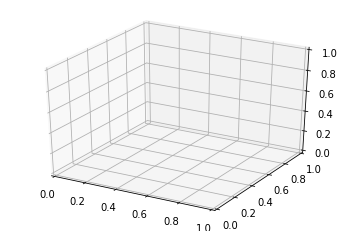

In [6]:
for _ in range(20):
    print("-------------------------------------------------------------")
    model_num = np.random.randint(0, 7612)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    _pt = data[model_num]
    _color = color[model_num]
    
    if Flag["augmentation"]:
        _pt = rotate_pc(_pt) # rotation
    
    xs = _pt[:, 0]
    ys = _pt[:, 1]
    zs = _pt[:, 2]
    s = 10
    
    c = _color /255.

    ax.scatter(xs, ys, zs, s=s, c=c, marker='o', zdir='y')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    if Flag["axis_normalize"]:
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        ax.set_zlim([-1,1])

    plt.show()
        